    # to be deleted 

In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra

In [2]:
cv_data = load("../data/experiment/dataset_2/m2/conv-matrix-upd-1.jld2")

cv_matrix = cv_data["cam_1"];

cv_matrix = cv_matrix;

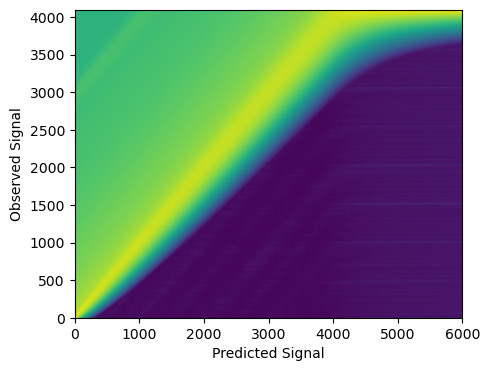

PyObject Text(24.0, 0.5, 'Observed Signal')

In [3]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.pcolormesh(cv_matrix)

ax.set_xlabel("Predicted Signal")
ax.set_ylabel("Observed Signal")

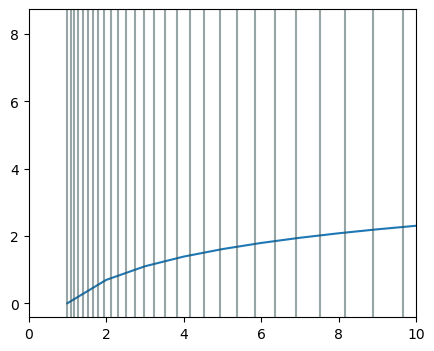

(0.0, 10.0)

In [4]:
xx = 1:4096
yy = log.(xx)
xx_bins = range(minimum(yy), stop = maximum(yy), length=100)


fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.plot(xx,yy)

for i in xx_bins
    ax.axvline(exp(i), linestyle="-", color="darkslategray", alpha=0.5)
end

ax.set_xlim(0, 10)

In [13]:
include("../src/likelihood.jl")
include("../src/utill.jl")

conv_mat = load("../data/experiment/dataset_2/m2/conv-matrix-upd-1.jld2");

In [ ]:
cv_tmp = conv_mat["cam_3"]

max_ind = 30

expected = 10
observed = 5
observed_prob = cv_tmp[observed+1, expected+1]

fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.scatter(0:max_ind-1, exp.(cv_tmp[1:max_ind,expected+1]))
ax.scatter(observed, exp(observed_prob), color="red")

ax.set_xlabel("Observed")
ax.set_ylabel("P(Observed)")

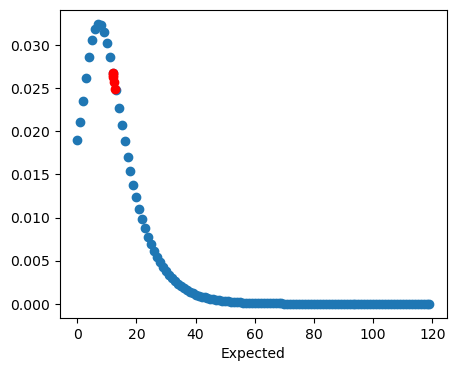

PyObject Text(0.5, 24.0, 'Expected')

In [44]:
cv_tmp = conv_mat["cam_3"]

max_ind = 120
observed_ind = 10

expected_ind = [10, 10.1, 10.2, 10.5, 10.9]  .+ 2
prob_expected = [background_conv(cv_tmp, observed_ind, i) for i in expected_ind]

fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.scatter(0:max_ind-1, exp.(cv_tmp[observed_ind+1,1:max_ind]))

ax.scatter(expected_ind, exp.(prob_expected), color="red")

ax.set_xlabel("Expected")